OCR Image Files

In [ ]:
!pip install keras-ocr
!apt-get install poppler-utils &> /dev/null
!pip install pdf2image &> /dev/null

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import numpy as np

In [ ]:
# Download pipeline untuk detector dan recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
!mkdir uploads

In [ ]:
# Upload Document File

from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
from google.colab import files

print("Silakan upload dokumen rekam medis (.png atau .pdf)")

uploaded = files.upload()
uploaded_files = list(uploaded.keys())

for fn in uploaded.keys():
    print("")
    if (fn.lower()[-4:] != ".pdf"):   # jika dokumen dalam bentuk image
      for uploaded_file in uploaded_files:
        print(uploaded_file)
        !mv $uploaded_file '/content/uploads'
    else:  # jika dokumen dalam bentuk pdf
      images = convert_from_bytes(uploaded[fn], size=800)
      for i, page in enumerate(images):
            name = f"{fn[:-4]}_{i+1}.png"
            page.save(name, "PNG")
      print(name)
      !mv $name '/content/uploads'

Silakan upload dokumen rekam medis (.png atau .pdf)


Saving hasil_cekdarah_prodia.png to hasil_cekdarah_prodia.png

hasil_cekdarah_prodia.png


In [ ]:
uploads_dir = "/content/uploads"
custom_images = []

for filename in os.listdir(uploads_dir):
    print(os.path.join(uploads_dir, filename))
    custom_images.append(os.path.join(uploads_dir, filename))

images = [keras_ocr.tools.read(path) for path in custom_images]

# Print shape
import numpy as np
print(np.shape(images))

/content/uploads/hasil_cekdarah_prodia.png
(1, 1068, 880, 3)


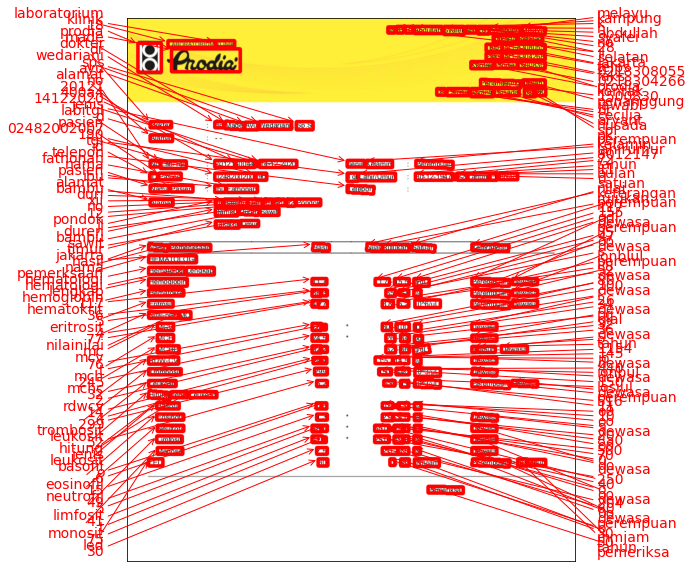

In [ ]:
# Each list of predictions in prediction is a list of (word, box) tuples.
predictions = pipeline.recognize(images)

# Plot predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))
if(len(custom_images) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [ ]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n")
    print("Results for the file: " + os.path.basename(custom_images[idx]))
    f.write("Results for the file: " + os.path.basename(custom_images[idx]) + ":\n\n")

    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        f.write(word + " ")
        print(word,  end = ' ')
    
    print("\n")

    for a in range (len(prediction)):
      if(prediction[a][0] == "hematokrit"):
        hm = prediction[a+1][0]
        print("Hematokrit: " + prediction[a+1][0])
        break

    for b in range (len(prediction)):
      if(prediction[b][0] == "hemoglobin"):
        hb = prediction[b+1][0]
        print("Hemoglobin: " + prediction[b+1][0])
        break

    for c in range (len(prediction)):
      if(prediction[c][0] == "eritrosit"):
        er = prediction[c+1][0]
        print("Eritrosit: " + prediction[c+1][0])
        break
    
    for d in range (len(prediction)):
      if(prediction[d][0] == "leukosit"):
        leu = prediction[d+1][0]
        print("Leukosit: " + prediction[d+1][0])
        break

    for e in range (len(prediction)):
      if(prediction[e][0] == "trombosit"):
        tro = prediction[e+1][0]
        print("Trombosit: " + prediction[e+1][0])
        break

    for f in range (len(prediction)):
      if(prediction[f][0] == "mch"):
        mch = prediction[f+1][0]
        print("MCH: " + prediction[f+1][0])
        break

    for g in range (len(prediction)):
      if(prediction[g][0] == "mchc"):
        mchc = prediction[g+1][0]
        print("MCHC: " + prediction[g+1][0])
        break

    for h in range (len(prediction)):
      if(prediction[h][0] == "mcv"):
        mcv = prediction[g+1][0]
        print("MCV: " + prediction[g+1][0])
        break

Results for the file: hasil_cekdarah_prodia.png
k h abdullah syafei no 28 kampung melayu jl selatan jakarta laboratorium klinik telps 0218308055 18 prodia faks 0218304266 kontak prodia 1500830 penanggung jawabl dr cecilia aryant husada spl pk dokter dr made wedariani sps ayu alamat no 20121 400a4 14122020 jenis kelamin perempuan labitgl d pasien 02482002007 190 tgl lahirumur 8012147 72 tahun 11 bulan id d nama pasien ibu fathonah telepon alamat bambu duri xii no 12 pondok jl bambu duren sawit timur jakarta hasil nilai satuan nama pemerksaan rujukan keterangan hematologi hematologi lengkap hemoglobin 117 117 155 gdl perempuan dewasa hematokrit 36 5 35 47 oo perempuan dewasa s lonblul eritrosit 4 77 38 52 perempuan dewasa nilainilai mc mcv 76 80 100 dewasa t l mch 245 26 34 dewasa pg mchc 32 32 36 glal dewasa 2 5 tahun rdwcv 1154 145 jo 14 4 dewasa 299 440 ionbul trombosit 150 dewasa losiul leukosit 52 516 11 perempuan dewasa hitung jenis leukosit basofil o 6 o0 10 oo s eosinofil 15 20 8

In [ ]:
files.download("results.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>